In [1]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F","#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#31598C"])


In [3]:
df = pd.read_csv('Telco_Churn_Data.csv')

In [4]:
df.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [5]:
df.columns

Index(['Target Churn', 'Target Code', 'Current Bill Amt', 'Avg Calls',
       'Avg Calls Weekdays', 'Account Age', 'Percent Increase MOM',
       'Acct Plan Subtype', 'Complaint Code', 'Avg Days Delinquent',
       'Current TechSupComplaints', 'Current Days OpenWorkOrders',
       'Equipment Age', 'Condition of Current Handset',
       'Avg Hours WorkOrderOpenned'],
      dtype='object')

In [6]:
df = df[['Target Churn','Current Bill Amt', 'Avg Calls',\
       'Avg Calls Weekdays', 'Account Age', 'Percent Increase MOM',\
       'Acct Plan Subtype', 'Complaint Code', 'Avg Days Delinquent',\
       'Current TechSupComplaints', 'Current Days OpenWorkOrders',\
       'Equipment Age', 'Condition of Current Handset',\
       'Avg Hours WorkOrderOpenned','Target Code']]

In [7]:
df.head()

,Target Churn,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned,Target Code
0,No Churn,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0,0
1,Churn,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0,1
2,Churn,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0,1
3,No Churn,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0,0
4,No Churn,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0,0


### Unique Values

In [8]:
df.shape

(4708, 15)

In [9]:
for x in df.columns:
   print(x, len(df[x].unique()))

Target Churn 2
Current Bill Amt 3478
Avg Calls 4385
Avg Calls Weekdays 4560
Account Age 26
Percent Increase MOM 3904
Acct Plan Subtype 2
Complaint Code 7
Avg Days Delinquent 393
Current TechSupComplaints 11
Current Days OpenWorkOrders 96
Equipment Age 40
Condition of Current Handset 4
Avg Hours WorkOrderOpenned 91
Target Code 2


In [10]:
df.columns

Index(['Target Churn', 'Current Bill Amt', 'Avg Calls', 'Avg Calls Weekdays',
       'Account Age', 'Percent Increase MOM', 'Acct Plan Subtype',
       'Complaint Code', 'Avg Days Delinquent', 'Current TechSupComplaints',
       'Current Days OpenWorkOrders', 'Equipment Age',
       'Condition of Current Handset', 'Avg Hours WorkOrderOpenned',
       'Target Code'],
      dtype='object')

In [11]:
## Bonus method for renaming the columns
df.columns = df.columns.str.replace(' ','_')


In [12]:
df.columns

Index(['Target_Churn', 'Current_Bill_Amt', 'Avg_Calls', 'Avg_Calls_Weekdays',
       'Account_Age', 'Percent_Increase_MOM', 'Acct_Plan_Subtype',
       'Complaint_Code', 'Avg_Days_Delinquent', 'Current_TechSupComplaints',
       'Current_Days_OpenWorkOrders', 'Equipment_Age',
       'Condition_of_Current_Handset', 'Avg_Hours_WorkOrderOpenned',
       'Target_Code'],
      dtype='object')

In [13]:
df.describe()

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned,Target_Code
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000,4708.000000
mean,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501,0.485769
std,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752,0.499851
min,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
50%,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000
75%,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000
max,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target_Churn                  4708 non-null   object 
 1   Current_Bill_Amt              4708 non-null   int64  
 2   Avg_Calls                     4708 non-null   float64
 3   Avg_Calls_Weekdays            4708 non-null   float64
 4   Account_Age                   4708 non-null   int64  
 5   Percent_Increase_MOM          4708 non-null   float64
 6   Acct_Plan_Subtype             4708 non-null   object 
 7   Complaint_Code                4701 non-null   object 
 8   Avg_Days_Delinquent           4708 non-null   float64
 9   Current_TechSupComplaints     4708 non-null   int64  
 10  Current_Days_OpenWorkOrders   4708 non-null   float64
 11  Equipment_Age                 4708 non-null   int64  
 12  Condition_of_Current_Handset  4264 non-null   float64
 13  Avg

In [15]:
df['Condition_of_Current_Handset'] = df['Condition_of_Current_Handset'].fillna(df['Condition_of_Current_Handset'].mode()[0])

In [16]:
df['Complaint_Code'] = df['Complaint_Code'].fillna(df['Complaint_Code'].mode()[0])

In [17]:
df.isna().sum()

Target_Churn                    0
Current_Bill_Amt                0
Avg_Calls                       0
Avg_Calls_Weekdays              0
Account_Age                     0
Percent_Increase_MOM            0
Acct_Plan_Subtype               0
Complaint_Code                  0
Avg_Days_Delinquent             0
Current_TechSupComplaints       0
Current_Days_OpenWorkOrders     0
Equipment_Age                   0
Condition_of_Current_Handset    0
Avg_Hours_WorkOrderOpenned      0
Target_Code                     0
dtype: int64

In [18]:
df['Target_Churn'].value_counts()

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

In [19]:
df['Target_Churn'].value_counts(1) *100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [20]:
df.corr()[['Target_Code']] 

,Target_Code
Current_Bill_Amt,0.019995
Avg_Calls,0.007375
Avg_Calls_Weekdays,-0.014987
Account_Age,-0.089890
Percent_Increase_MOM,-0.059899
Avg_Days_Delinquent,0.460092
Current_TechSupComplaints,0.045102
Current_Days_OpenWorkOrders,0.002891
Equipment_Age,0.042373
Condition_of_Current_Handset,-0.005680


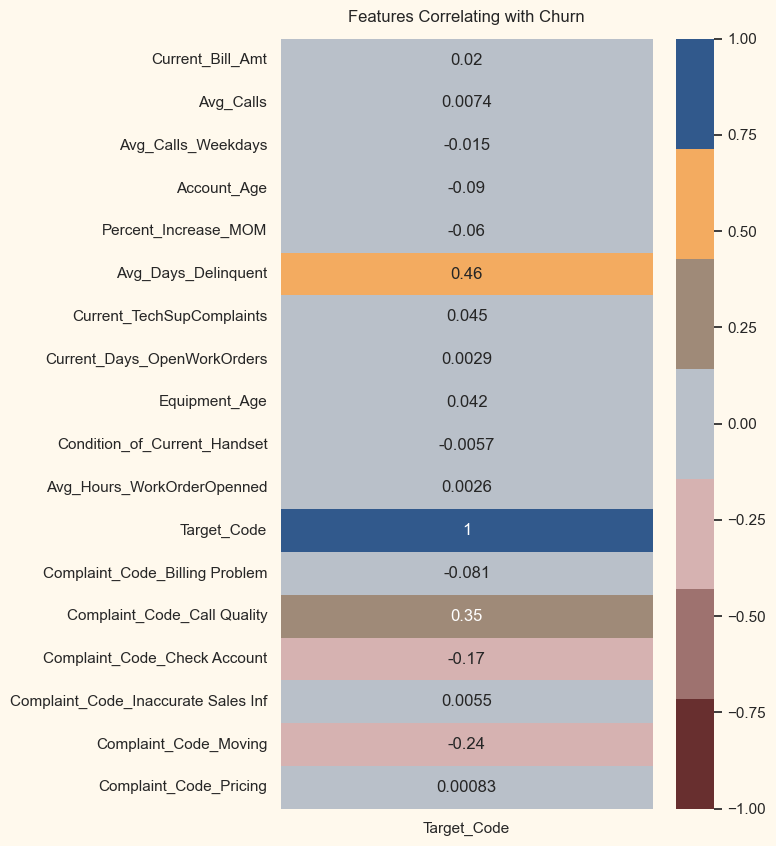

In [110]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(df.corr()[['Target_Code']],vmin=-1, vmax=1, annot=True, cmap = cmap)
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':12}, pad=12);

In [22]:
# Create an array with the colors you want to use
colors = ["#682F2F", "#D6B2B1"]

In [23]:
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

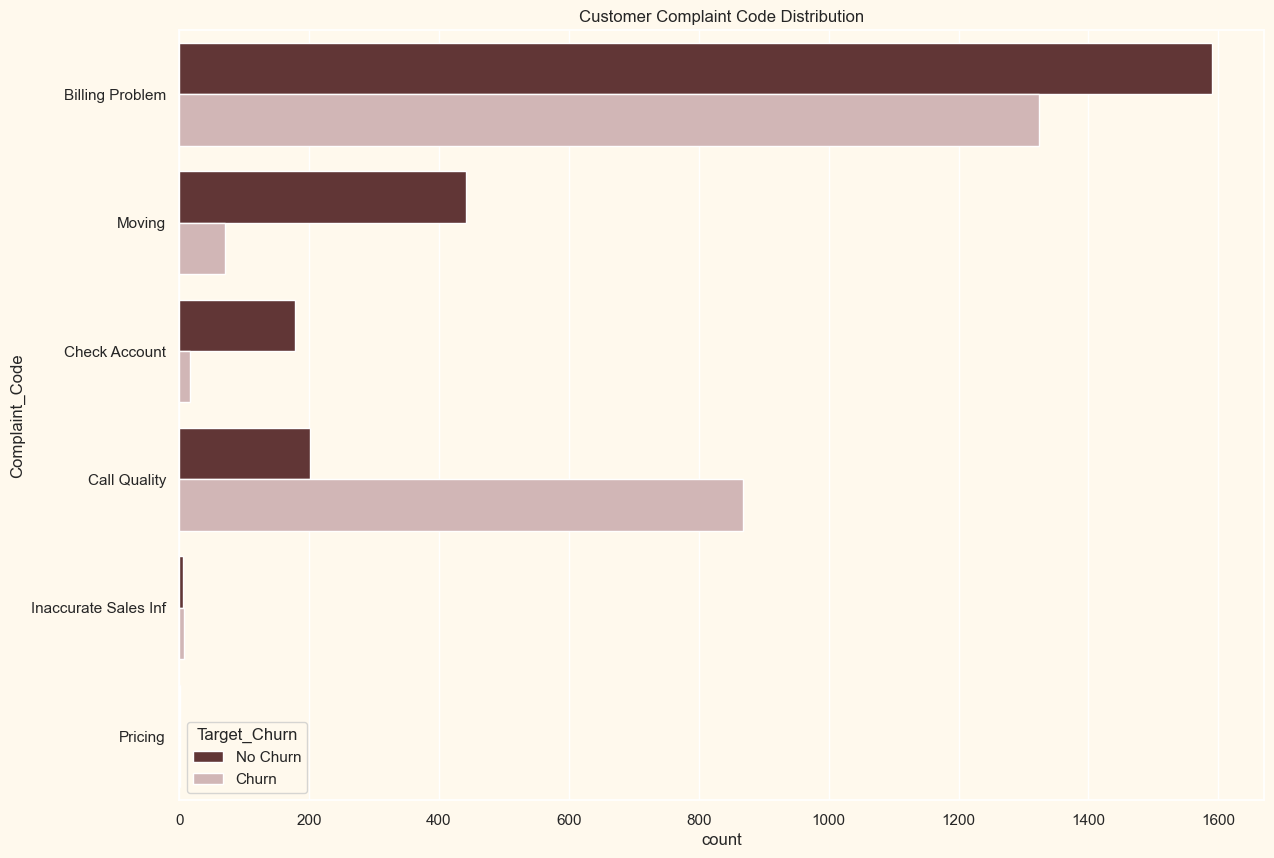

In [24]:
plt.figure(figsize=(14,10)) 
p=sns.countplot(y="Complaint_Code", hue='Target_Churn',data=df) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Complaint Code Distribution')

Text(0.5, 1.0, 'By Account Plan Subtype')

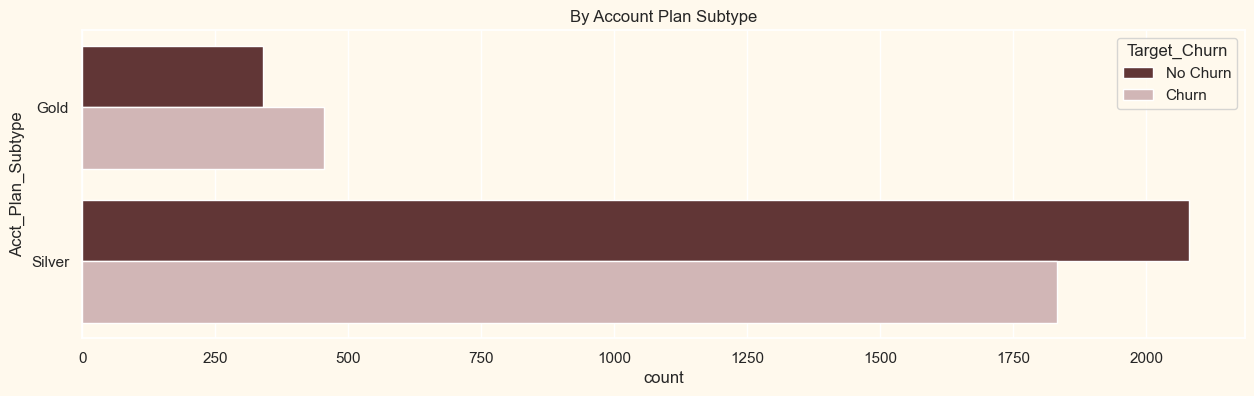

In [25]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn',data=df) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('By Account Plan Subtype')

Text(0.5, 1.0, 'By Current Tech Support Complaints Typees')

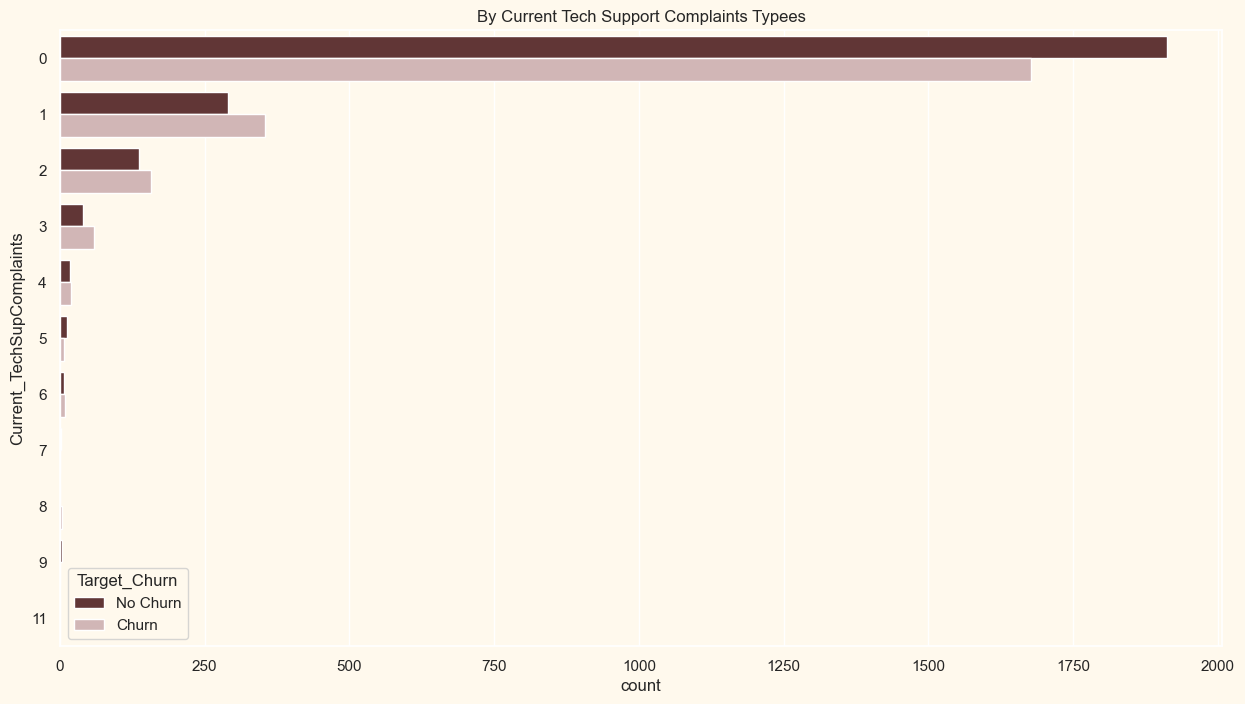

In [26]:
plt.figure(figsize=(15,8)) 
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn',data=df) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('By Current Tech Support Complaints Typees')

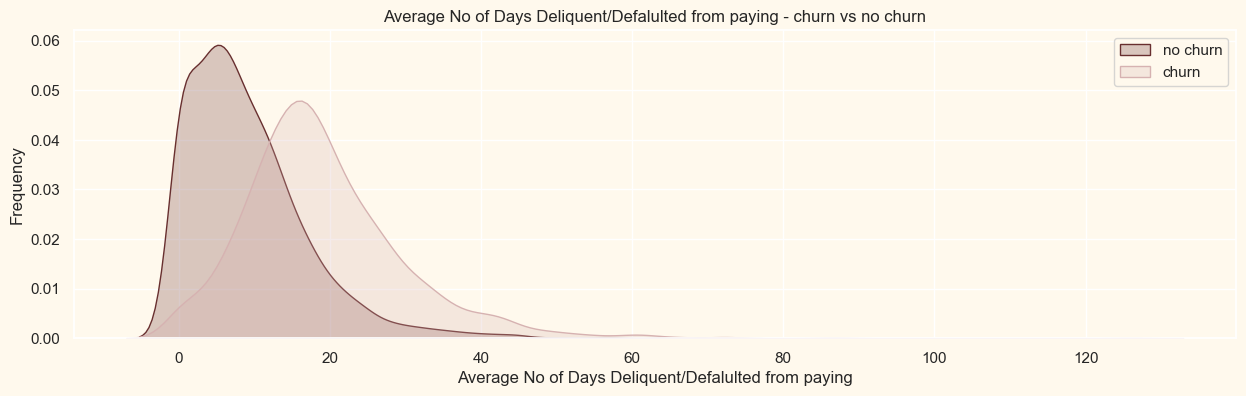

In [27]:
plt.figure(figsize=(15,4)) 

ax=sns.kdeplot(df.loc[(df['Target_Code'] == 0), \
                        'Avg_Days_Delinquent'] , \
               shade=True,label='no churn') 


ax=sns.kdeplot(df.loc[(df['Target_Code'] == 1),\
                        'Avg_Days_Delinquent'] , \
               shade=True, label='churn') 

ax.set(xlabel='Average No of Days Deliquent/Defalulted \
from paying', ylabel='Frequency') 

plt.title('Average No of Days Deliquent/Defalulted from \
paying - churn vs no churn')

plt.legend()

In [28]:
churn_by_account_age = df.groupby(
    by='Account_Age'
)['Target_Code'].sum() / df.groupby(
    by='Account_Age'
)['Target_Code'].count() *100

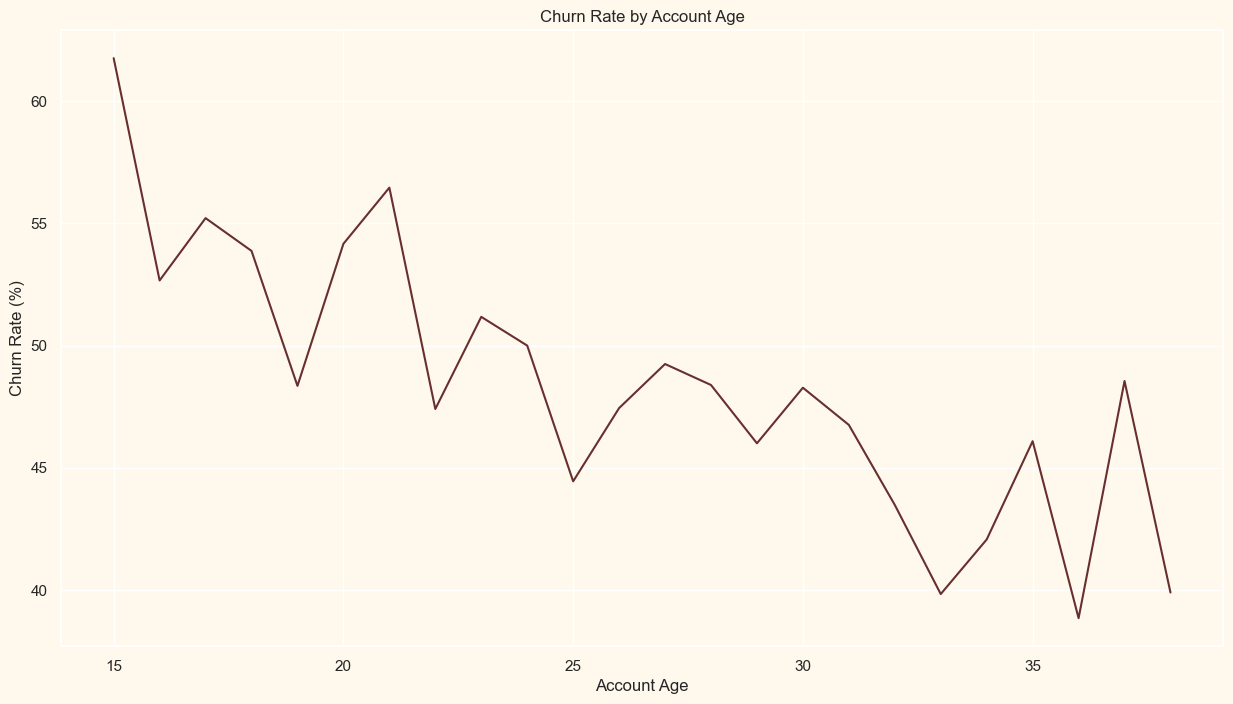

In [29]:
ax = churn_by_account_age.head(24).plot(
    grid=True,
    figsize=(15, 8),
    title='Churn Rate by Account Age'
)

ax.set_xlabel('Account Age')
ax.set_ylabel('Churn Rate (%)')

plt.show()

In [30]:
duration_df = pd.concat([
    df.loc[df['Target_Code'] == 1, 'Avg_Days_Delinquent'].reset_index(drop=True), 
    df.loc[df['Target_Code'] == 0, 'Avg_Days_Delinquent'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['Churn', 'No Churn']


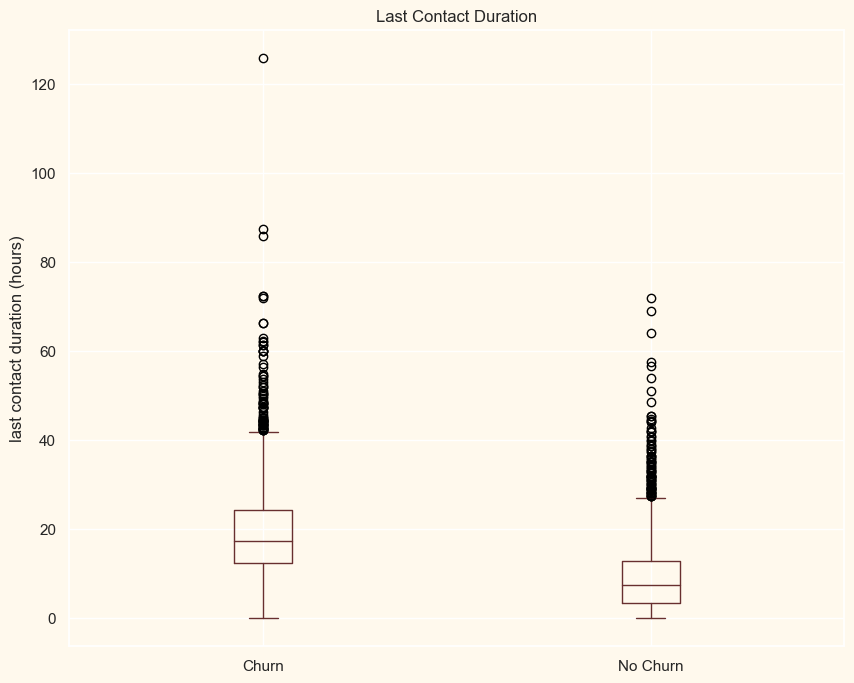

In [31]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 8),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

In [32]:
#Ordinal Encoder

In [33]:
df['Acct_Plan_Subtype'].value_counts()

Silver    3914
Gold       794
Name: Acct_Plan_Subtype, dtype: int64

In [34]:
catcols = ['Acct_Plan_Subtype','Complaint_Code']

In [35]:
for col in df[catcols].columns:
    df[col] = df[col].astype('category')

In [36]:
df.head()

,Target_Churn,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned,Target_Code
0,No Churn,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0,0
1,Churn,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0,1
2,Churn,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0,1
3,No Churn,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0,0
4,No Churn,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0,0


In [37]:
df['Acct_Plan_Subtype'] = df['Acct_Plan_Subtype'].apply(lambda x: 1 if x == 'Gold' else 0)

In [38]:
df.head()

,Target_Churn,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned,Target_Code
0,No Churn,14210,17950.000000,30297.0000,24,-0.334193,1,Billing Problem,6.2,0,0.0,8,1.0,0.0,0
1,Churn,14407,0.000000,0.0000,28,0.000000,0,Moving,1.0,0,0.0,17,1.0,0.0,1
2,Churn,12712,204.666667,10393.6667,23,0.000000,1,Billing Problem,17.6,0,0.0,23,1.0,0.0,1
3,No Churn,13807,15490.333300,41256.3333,39,0.148986,0,Billing Problem,0.0,0,0.0,17,1.0,0.0,0
4,No Churn,3805,5075.000000,12333.3333,23,-0.686047,1,Billing Problem,3.8,0,0.0,10,1.0,0.0,0


In [39]:
Complaint_Code_Encoded = pd.get_dummies(df['Complaint_Code'])
Complaint_Code_Encoded.columns = ['Complaint_Code_%s' % x for x in Complaint_Code_Encoded.columns]

In [40]:
Complaint_Code_Encoded.head()

,Complaint_Code_Billing Problem,Complaint_Code_Call Quality,Complaint_Code_Check Account,Complaint_Code_Inaccurate Sales Inf,Complaint_Code_Moving,Complaint_Code_Pricing
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [41]:
df = pd.concat([df, Complaint_Code_Encoded], axis=1)

In [42]:
df.head()

,Target_Churn,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_TechSupComplaints,...,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned,Target_Code,Complaint_Code_Billing Problem,Complaint_Code_Call Quality,Complaint_Code_Check Account,Complaint_Code_Inaccurate Sales Inf,Complaint_Code_Moving,Complaint_Code_Pricing
0,No Churn,14210,17950.000000,30297.0000,24,-0.334193,1,Billing Problem,6.2,0,...,8,1.0,0.0,0,1,0,0,0,0,0
1,Churn,14407,0.000000,0.0000,28,0.000000,0,Moving,1.0,0,...,17,1.0,0.0,1,0,0,0,0,1,0
2,Churn,12712,204.666667,10393.6667,23,0.000000,1,Billing Problem,17.6,0,...,23,1.0,0.0,1,1,0,0,0,0,0
3,No Churn,13807,15490.333300,41256.3333,39,0.148986,0,Billing Problem,0.0,0,...,17,1.0,0.0,0,1,0,0,0,0,0
4,No Churn,3805,5075.000000,12333.3333,23,-0.686047,1,Billing Problem,3.8,0,...,10,1.0,0.0,0,1,0,0,0,0,0


In [43]:
feature_cols = df.columns.tolist()

In [44]:
items_to_remove =['Target_Churn','Complaint_Code']

In [45]:
feature_cols = [item for item in feature_cols if item not in items_to_remove]
feature_cols

['Current_Bill_Amt',
 'Avg_Calls',
 'Avg_Calls_Weekdays',
 'Account_Age',
 'Percent_Increase_MOM',
 'Acct_Plan_Subtype',
 'Avg_Days_Delinquent',
 'Current_TechSupComplaints',
 'Current_Days_OpenWorkOrders',
 'Equipment_Age',
 'Condition_of_Current_Handset',
 'Avg_Hours_WorkOrderOpenned',
 'Target_Code',
 'Complaint_Code_Billing Problem',
 'Complaint_Code_Call Quality',
 'Complaint_Code_Check Account',
 'Complaint_Code_Inaccurate Sales Inf',
 'Complaint_Code_Moving',
 'Complaint_Code_Pricing']

### Feature Selection

In [46]:
from feature_engine.encoding import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score

In [47]:
X_train, X_test, y_train, y_test =  \
  train_test_split(df[feature_cols],\
  df[['Target_Code']], test_size=0.3,random_state=0)

In [48]:
scaler = StandardScaler()

In [49]:
standcols = X_train.iloc[:,:-7].columns

In [50]:
scaler.fit(X_train[standcols])

StandardScaler()

In [51]:
X_train_enc = \
  pd.DataFrame(scaler.transform(X_train[standcols]),\
 columns=standcols, index=X_train.index).\
  join(X_train[['Complaint_Code_Billing Problem','Complaint_Code_Call Quality','Complaint_Code_Check Account',\
 'Complaint_Code_Inaccurate Sales Inf','Complaint_Code_Moving','Complaint_Code_Pricing']])

In [52]:
X_test_enc = \
  pd.DataFrame(scaler.transform(X_test[standcols]),\
 columns=standcols, index=X_test.index).\
  join(X_test[['Complaint_Code_Billing Problem','Complaint_Code_Call Quality','Complaint_Code_Check Account',\
 'Complaint_Code_Inaccurate Sales Inf','Complaint_Code_Moving','Complaint_Code_Pricing']])

In [53]:
rfc = RandomForestClassifier(n_estimators=100,\
  max_depth=2, n_jobs=-1, random_state=0)

In [54]:
borsel = BorutaPy(rfc, random_state=0, verbose=2)

In [55]:
borsel.fit(X_train_enc.values, y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	5


BorutaPy(estimator=RandomForestClassifier(max_depth=2, n_estimators=1000,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FA4A8356440),
         random_state=RandomState(MT19937) at 0x7FA4A8356440, verbose=2)

In [56]:
selcols = X_train_enc.columns[borsel.support_]
selcols

Index(['Current_Bill_Amt', 'Avg_Calls', 'Avg_Calls_Weekdays', 'Account_Age',
       'Percent_Increase_MOM', 'Acct_Plan_Subtype', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Equipment_Age',
       'Complaint_Code_Billing Problem', 'Complaint_Code_Call Quality',
       'Complaint_Code_Check Account', 'Complaint_Code_Moving'],
      dtype='object')

In [57]:
pd.DataFrame({'ranking': borsel.ranking_,\
              'feature': X_train_enc.columns},columns=['feature','ranking']).\
sort_values(['ranking'], ascending=True)

,feature,ranking
0,Current_Bill_Amt,1
1,Avg_Calls,1
2,Avg_Calls_Weekdays,1
3,Account_Age,1
4,Percent_Increase_MOM,1
5,Acct_Plan_Subtype,1
6,Avg_Days_Delinquent,1
7,Current_TechSupComplaints,1
16,Complaint_Code_Moving,1
9,Equipment_Age,1


### Fitting Random Forest

In [58]:
feature_cols_r = df.columns.tolist()

In [59]:
items_to_remove_r = ['Target_Churn','Complaint_Code','Current_Days_OpenWorkOrders','Avg_Hours_WorkOrderOpenned',\
                   'Complaint_Code_Inaccurate Sales Inf','Condition_of_Current_Handset','Complaint_Code_Pricing','Target_Code']

In [60]:
feature_cols_r = [item for item in feature_cols_r if item not in items_to_remove_r]

In [61]:
feature_cols_r

['Current_Bill_Amt',
 'Avg_Calls',
 'Avg_Calls_Weekdays',
 'Account_Age',
 'Percent_Increase_MOM',
 'Acct_Plan_Subtype',
 'Avg_Days_Delinquent',
 'Current_TechSupComplaints',
 'Equipment_Age',
 'Complaint_Code_Billing Problem',
 'Complaint_Code_Call Quality',
 'Complaint_Code_Check Account',
 'Complaint_Code_Moving']

In [62]:
X_train_r, X_test_r, y_train_r, y_test_r =  \
  train_test_split(df[feature_cols_r],\
  df[['Target_Code']], test_size=0.3,random_state=0)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
rf_params = {'max_depth':[3, 6, 9, 12, 15],
             'n_estimators':[10, 50, 100, 200, 300]}

In [65]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

In [66]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                     n_jobs=-1, refit=True, cv=4, verbose=2,
                     error_score=np.nan, return_train_score=True)

In [67]:
cv_rf.fit(X_train_r.values, y_train_r.values.ravel())

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'n_estimators': [10, 50, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [68]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [69]:
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.020268,0.001674,0.003666,0.000633,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.851102,0.860550,0.871572,0.866182,0.862352,0.007574,25,0.876252,0.876508,0.874460,0.874622,0.875461,0.000926
1,0.092480,0.009596,0.005656,0.000217,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.864437,0.876427,0.883314,0.875905,0.875021,0.006774,22,0.890848,0.889351,0.883354,0.887090,0.887661,0.002823
2,0.177236,0.019469,0.009966,0.001174,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.868171,0.879406,0.889535,0.880745,0.879464,0.007593,19,0.895348,0.891805,0.889273,0.891651,0.892019,0.002168
3,0.308000,0.007835,0.016273,0.000942,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.870044,0.881630,0.896602,0.885429,0.883426,0.009486,17,0.898713,0.895430,0.892088,0.894640,0.895218,0.002366
4,0.445491,0.007226,0.032022,0.005452,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.869967,0.881730,0.896442,0.885352,0.883373,0.009449,18,0.898650,0.895298,0.891509,0.894222,0.894920,0.002558
5,0.023828,0.002949,0.001842,0.000019,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.871563,0.875486,0.883933,0.877848,0.877207,0.004485,21,0.915233,0.918659,0.915395,0.919121,0.917102,0.001796
6,0.102793,0.000533,0.005511,0.000164,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.879276,0.885022,0.896454,0.890823,0.887894,0.006410,13,0.927093,0.927223,0.923194,0.927840,0.926338,0.001837
7,0.213030,0.004758,0.011342,0.001548,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.878539,0.885553,0.899923,0.892065,0.889020,0.007906,10,0.928965,0.928215,0.924271,0.928717,0.927542,0.001908
8,0.402544,0.006572,0.023441,0.002798,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.878739,0.886744,0.901173,0.892088,0.889686,0.008158,6,0.929531,0.928575,0.925058,0.929116,0.928070,0.001772
9,0.652555,0.036184,0.041744,0.005562,6,300,"{'max_depth': 6, 'n_estimators': 300}",0.878149,0.886202,0.902330,0.891592,0.889568,0.008785,7,0.929354,0.928884,0.924786,0.928768,0.927948,0.001839


In [70]:
cv_rf_results_df.max()

mean_fit_time         0.903929
std_fit_time          0.036184
mean_score_time       0.044403
std_score_time        0.008678
param_max_depth             15
param_n_estimators         300
split0_test_score      0.88347
split1_test_score     0.889582
split2_test_score     0.903722
split3_test_score     0.892307
mean_test_score       0.891946
std_test_score        0.009486
rank_test_score             25
split0_train_score    0.999956
split1_train_score    0.999857
split2_train_score    0.999909
split3_train_score    0.999994
mean_train_score      0.999928
std_train_score       0.002905
dtype: object

In [71]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [72]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':feature_cols_r,
    'Importance':cv_rf.best_estimator_.feature_importances_
})

In [73]:
feat_imp_df_act.sort_values('Importance', ascending=False)

,Feature name,Importance
6,Avg_Days_Delinquent,0.329056
4,Percent_Increase_MOM,0.269084
10,Complaint_Code_Call Quality,0.085989
2,Avg_Calls_Weekdays,0.054053
1,Avg_Calls,0.046780
0,Current_Bill_Amt,0.046630
3,Account_Age,0.037833
12,Complaint_Code_Moving,0.035581
8,Equipment_Age,0.033256
9,Complaint_Code_Billing Problem,0.020791


In [74]:
feat_imp_df = pd.DataFrame({
    'Importance':cv_rf.best_estimator_.feature_importances_},index=feature_cols_r)


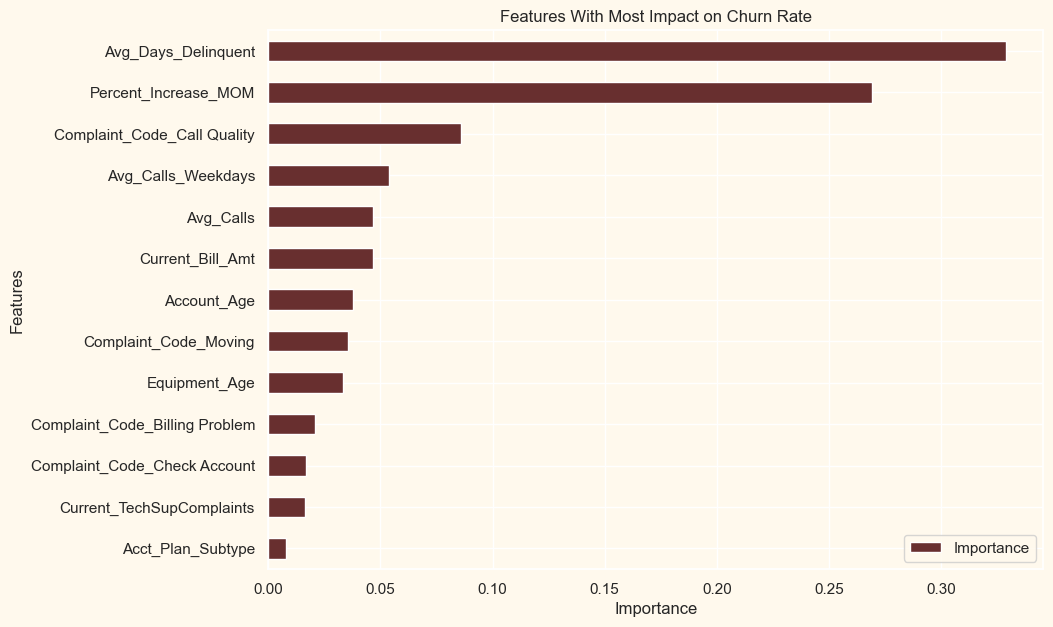

In [75]:
ax = feat_imp_df.sort_values('Importance', ascending=True).plot(
    kind='barh',
    grid=True,
    figsize=(10, 7),
    title='Features With Most Impact on Churn Rate'
)

ax.set_xlabel('Importance')
ax.set_ylabel('Features')

plt.show()

In [77]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [92]:
cm_rf = plt.cm.twilight_shifted

Text(0, 0.5, 'Maximum depth')

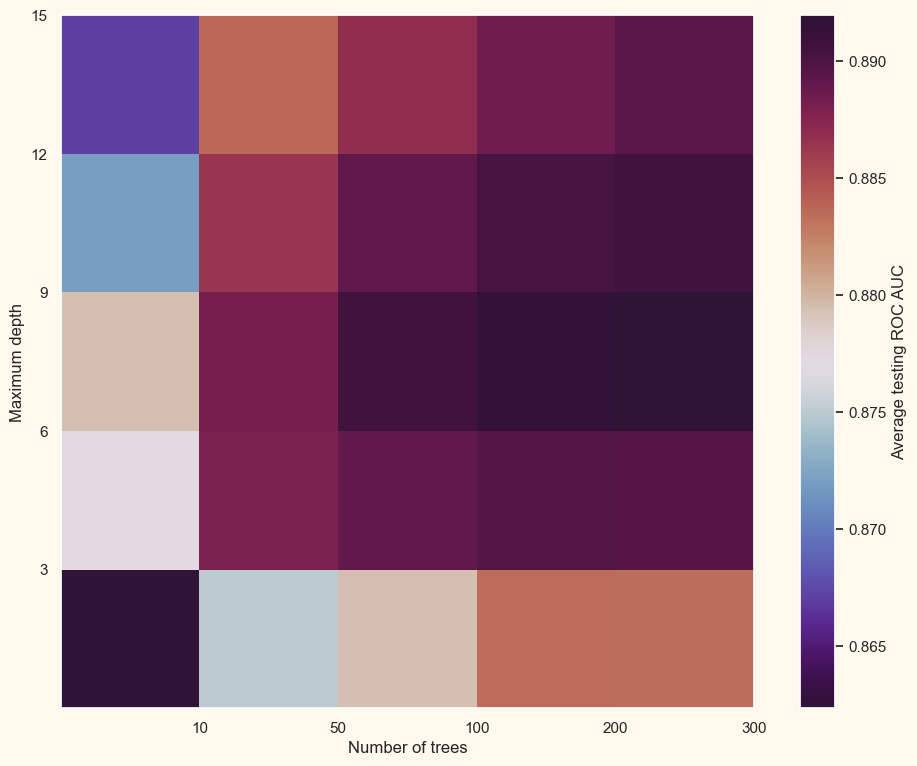

In [96]:
plt.figure(figsize=(12,9)) 
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((5,5)),cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [76]:
cv_rf.score(X_test_r, y_test_r)

0.8802023642556602